In [1]:
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
with open('train.json') as f:
  train_json_df = json.load(f)

In [4]:
train_df = pd.io.json.json_normalize(train_json_df) 

<ipython-input-4-6ae5475da184>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  train_df = pd.io.json.json_normalize(train_json_df)


In [5]:
sim_cols = ['requester_days_since_first_post_on_raop_at_request',
          'requester_days_since_first_post_on_raop_at_retrieval',
         'requester_number_of_comments_at_request', 
         'requester_number_of_comments_at_retrieval',
         'requester_username',
          'requester_user_flair',
         'unix_timestamp_of_request',
         'unix_timestamp_of_request_utc']

In [6]:
train_df[sim_cols].describe()

,requester_days_since_first_post_on_raop_at_request,requester_days_since_first_post_on_raop_at_retrieval,requester_number_of_comments_at_request,requester_number_of_comments_at_retrieval,unix_timestamp_of_request,unix_timestamp_of_request_utc
count,4040.000000,4040.000000,4040.000000,4040.000000,4.040000e+03,4.040000e+03
mean,16.417034,518.993205,115.098267,289.425743,1.342829e+09,1.342826e+09
std,70.651428,267.872623,193.318968,357.416133,2.333057e+07,2.332989e+07
min,0.000000,0.000000,0.000000,0.000000,1.297723e+09,1.297723e+09
25%,0.000000,279.009051,0.000000,8.000000,1.320469e+09,1.320466e+09
50%,0.000000,528.781939,24.000000,114.000000,1.342565e+09,1.342561e+09
75%,0.000000,776.226670,140.250000,479.000000,1.364618e+09,1.364614e+09
max,785.457685,1025.407593,994.000000,1000.000000,1.381552e+09,1.381523e+09


In [7]:
train_df[sim_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4040 entries, 0 to 4039
Data columns (total 8 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   requester_days_since_first_post_on_raop_at_request    4040 non-null   float64
 1   requester_days_since_first_post_on_raop_at_retrieval  4040 non-null   float64
 2   requester_number_of_comments_at_request               4040 non-null   int64  
 3   requester_number_of_comments_at_retrieval             4040 non-null   int64  
 4   requester_username                                    4040 non-null   object 
 5   requester_user_flair                                  994 non-null    object 
 6   unix_timestamp_of_request                             4040 non-null   float64
 7   unix_timestamp_of_request_utc                         4040 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 252.6+ KB


Summary:
- Number of comments on Reddit are higher at retrieval than at requester
- Requester username & requester user flair is a text field 
- only field with nulls is "requester_user_flair"

# Colname: requester_days_since_first_post_on_raop_at_request

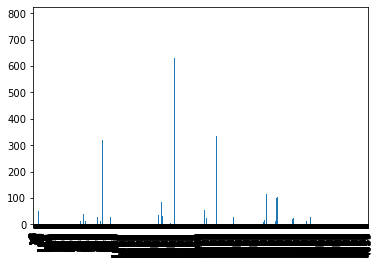

In [8]:
train_df['requester_days_since_first_post_on_raop_at_request'].plot(kind='bar')

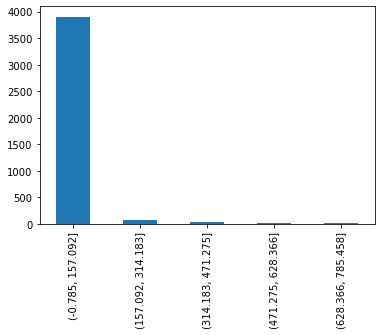

In [92]:
train_df['requester_days_since_first_post_on_raop_at_request_bins'] = pd.cut(train_df['requester_days_since_first_post_on_raop_at_request'],
                                                                 5)
train_df['requester_days_since_first_post_on_raop_at_request_bins'].value_counts().plot(kind='bar')

In [47]:
pd.DataFrame(train_df['requester_days_since_first_post_on_raop_at_request_bins'].value_counts()/len(train_df))

,requester_days_since_first_post_on_raop_at_request_bins
"(-0.785, 157.092]",0.966337
"(157.092, 314.183]",0.017079
"(314.183, 471.275]",0.009406
"(471.275, 628.366]",0.004208
"(628.366, 785.458]",0.002970


/Users/simranbhatia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


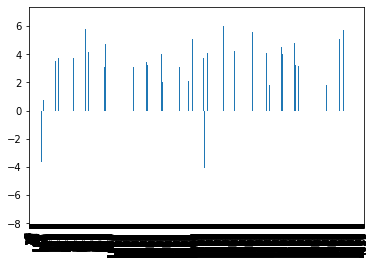

In [9]:
# transform variable to be log based
np.log(train_df['requester_days_since_first_post_on_raop_at_request']).plot(kind='bar')

Summary:
- No null values, but majority of values between (-0.785 and 157). The negative value in this is confusing but it could be an outlier, should be ignored in analysis. Can build better buckets to understand this downward trend.

In [88]:
# relation with outcome variable
pd.crosstab(train_df.requester_received_pizza, train_df['requester_days_since_first_post_on_raop_at_request_bins'])

requester_days_since_first_post_on_raop_at_request_bins,"(-0.785, 157.092]","(157.092, 314.183]","(314.183, 471.275]","(471.275, 628.366]","(628.366, 785.458]"
requester_received_pizza,,,,,
False,2967,47,18,8,6
True,937,22,20,9,6


/Users/simranbhatia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/simranbhatia/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1211: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Users/simranbhatia/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Users/simranbhatia/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9baada4f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9baadc0940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9baada47f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9baadce2e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9baaddc9a0>,
 'means': []}

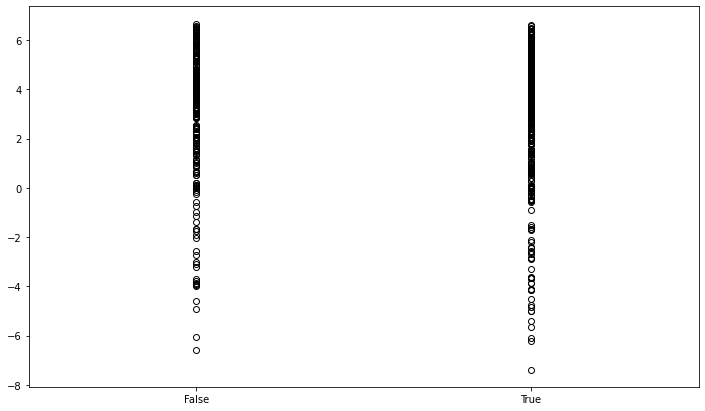

In [11]:
requester_days_since_first_post_on_raop_at_request_1 = np.log(train_df[train_df['requester_received_pizza'] == True]['requester_days_since_first_post_on_raop_at_request'])
requester_days_since_first_post_on_raop_at_request_0 = np.log(train_df[train_df['requester_received_pizza'] == False]['requester_days_since_first_post_on_raop_at_request'])

cols_requester_days_since_first_post_on_raop_at_request = [requester_days_since_first_post_on_raop_at_request_1, 
                                                           requester_days_since_first_post_on_raop_at_request_0]

labels = train_df['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(cols_requester_days_since_first_post_on_raop_at_request, labels=labels)

# Colname: requester_days_since_first_post_on_raop_at_retrieval

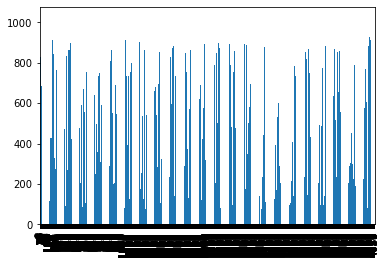

In [40]:
train_df['requester_days_since_first_post_on_raop_at_retrieval'].plot(kind='bar')

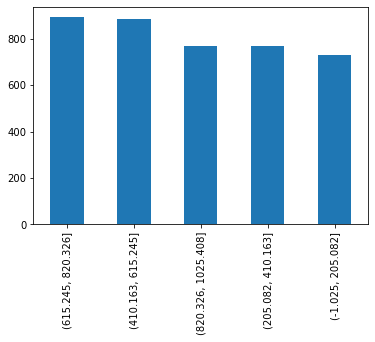

In [44]:
train_df['requester_days_since_first_post_on_raop_at_retrieval_bins'] = pd.cut(train_df['requester_days_since_first_post_on_raop_at_retrieval'],
                                                                 5)
train_df['requester_days_since_first_post_on_raop_at_retrieval_bins'].value_counts().plot(kind='bar')


In [48]:
pd.DataFrame(train_df['requester_days_since_first_post_on_raop_at_retrieval_bins'].value_counts()/len(train_df))

,requester_days_since_first_post_on_raop_at_retrieval_bins
"(615.245, 820.326]",0.220792
"(410.163, 615.245]",0.219059
"(820.326, 1025.408]",0.190099
"(205.082, 410.163]",0.189851
"(-1.025, 205.082]",0.180198


Summary:
- This data feels well distributed, but noisy. There is no downward trend as compared to the # of days at request.Next step would be to understand the influence of this column on outcome vs. that of the request one. 

In [93]:
# relation with outcome variable
pd.crosstab(train_df.requester_received_pizza, train_df['requester_days_since_first_post_on_raop_at_retrieval_bins'])

requester_days_since_first_post_on_raop_at_retrieval_bins,"(-1.025, 205.082]","(205.082, 410.163]","(410.163, 615.245]","(615.245, 820.326]","(820.326, 1025.408]"
requester_received_pizza,,,,,
False,606,601,681,654,504
True,122,166,204,238,264


# Colname: requester_number_of_comments_at_request

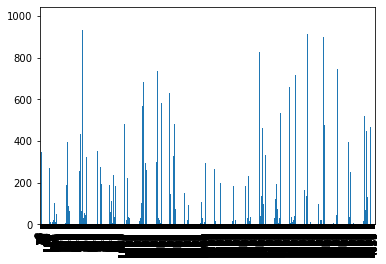

In [39]:
train_df['requester_number_of_comments_at_request'].plot(kind='bar')

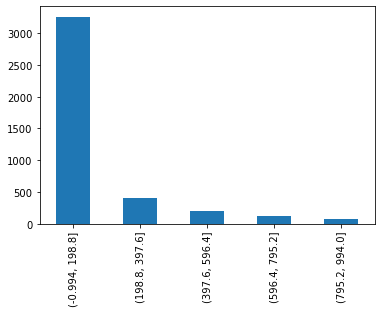

In [36]:
train_df['requester_number_of_comments_at_request_bins'] = pd.cut(train_df['requester_number_of_comments_at_request'],
                                                                 5)
train_df['requester_number_of_comments_at_request_bins'].value_counts().plot(kind='bar')

In [49]:
pd.DataFrame(train_df['requester_number_of_comments_at_request_bins'].value_counts()/len(train_df))

,requester_number_of_comments_at_request_bins
"(-0.994, 198.8]",0.807426
"(198.8, 397.6]",0.098267
"(397.6, 596.4]",0.047525
"(596.4, 795.2]",0.029208
"(795.2, 994.0]",0.017574


Summary:
- Majority of the values lie between -0.994, 198.8. This distribution seems similar to days since first post on RAOP, as collected on request time. Next step: look into the first bucket in more detail.

In [94]:
# relation with outcome variable
pd.crosstab(train_df.requester_received_pizza, train_df['requester_number_of_comments_at_request_bins'])

requester_number_of_comments_at_request_bins,"(-0.994, 198.8]","(198.8, 397.6]","(397.6, 596.4]","(596.4, 795.2]","(795.2, 994.0]"
requester_received_pizza,,,,,
False,2477,290,145,84,50
True,785,107,47,34,21


/Users/simranbhatia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9baf97b0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9baf97b790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9baf964d30>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9baf97be50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9baf94d190>,
 'means': []}

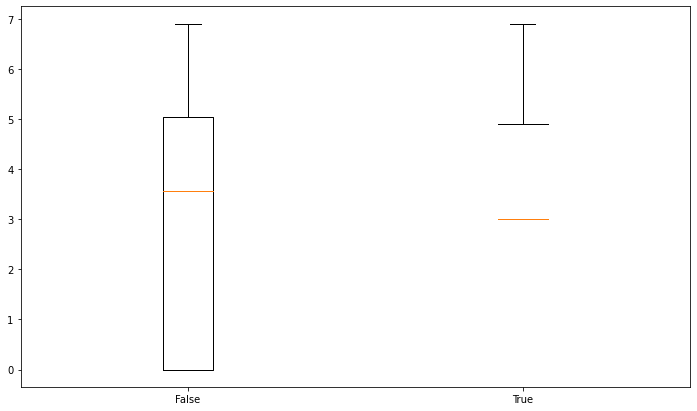

In [12]:
requester_number_of_comments_at_request_1 = np.log(train_df[train_df['requester_received_pizza'] == True]['requester_number_of_comments_at_request'])
requester_number_of_comments_at_request_0 = np.log(train_df[train_df['requester_received_pizza'] == False]['requester_number_of_comments_at_request'])

cols_requester_number_of_comments_at_request = [requester_number_of_comments_at_request_1, 
                                            requester_number_of_comments_at_request_0]

labels = train_df['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(cols_requester_number_of_comments_at_request, labels=labels)


# Colname: requester_number_of_comments_at_retrieval

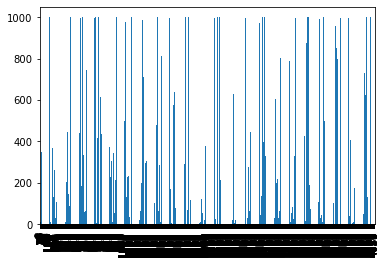

In [42]:
train_df['requester_number_of_comments_at_retrieval'].plot(kind='bar')

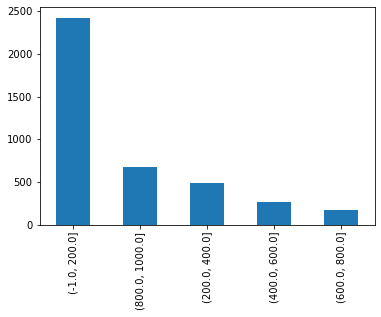

In [50]:
train_df['requester_number_of_comments_at_retrieval_bins'] = pd.cut(train_df['requester_number_of_comments_at_retrieval'],
                                                                 5)
train_df['requester_number_of_comments_at_retrieval_bins'].value_counts().plot(kind='bar')


In [51]:
pd.DataFrame(train_df['requester_number_of_comments_at_retrieval_bins'].value_counts()/len(train_df))

,requester_number_of_comments_at_retrieval_bins
"(-1.0, 200.0]",0.599505
"(800.0, 1000.0]",0.167822
"(200.0, 400.0]",0.122277
"(400.0, 600.0]",0.066089
"(600.0, 800.0]",0.044307


Summary:
- This seems like a good highly left skewed dataset. First bucket seems to have most amount of datapoints, this bucket should be further investigated.

In [95]:
# relation with outcome variable
pd.crosstab(train_df.requester_received_pizza, train_df['requester_number_of_comments_at_retrieval_bins'])

requester_number_of_comments_at_retrieval_bins,"(-1.0, 200.0]","(200.0, 400.0]","(400.0, 600.0]","(600.0, 800.0]","(800.0, 1000.0]"
requester_received_pizza,,,,,
False,1913,352,188,135,458
True,509,142,79,44,220


# Colname: requester_username

In [21]:
train_df.requester_username.value_counts()

knockerwocky       1
Brizzwold          1
BallerinaBonzai    1
juniormantis       1
Ticking__bomb      1
                  ..
MitchellHaaland    1
effigies           1
ghostofahorse      1
staglord           1
Cthomte            1
Name: requester_username, Length: 4040, dtype: int64

Summary:
- Each user has 1 requester username -> this seems weird as this seems like one person only requests once?
- Next step: analyze type of requester username but that seems like a stretch and not directly related to the request

In [96]:
# relation with outcome variable
pd.crosstab(train_df.requester_received_pizza, train_df['requester_username'])

requester_username,-Magitek-Armor-,-idk,-notagirl-,0b4m4,122david,124418609219,13853211,1level1,20TL12III,20greenshades,...,zimpirate,zombiehannah,zombisaurusrex,zomboi,zooey_roses,zpoehlein12,zqxwcevrbt,zratz3171,ztfreeman,zuggle
requester_received_pizza,,,,,,,,,,,,,,,,,,,,,
False,1,1,0,1,0,0,1,1,0,1,...,0,0,1,1,1,1,1,1,1,1
True,0,0,1,0,1,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0


# colname: requester_user_flair

In [22]:
train_df.requester_user_flair.value_counts()

shroom    935
PIF        59
Name: requester_user_flair, dtype: int64

- There are only two types "requester_user_flair" however, majority of these values are null. Given that this is binary, this might be helpful for the same scenario

In [97]:
# relation with outcome variable
pd.crosstab(train_df.requester_received_pizza, train_df['requester_user_flair'])

requester_user_flair,PIF,shroom
requester_received_pizza,,
True,59,935


- This is interesting that only values of success in dependent variable have `requester_user_flair`, as per training dataframe

# colname: unix_timestamp_of_request

In [52]:
train_df.unix_timestamp_of_request.value_counts()

1.380356e+09    2
1.313532e+09    1
1.363909e+09    1
1.347131e+09    1
1.363907e+09    1
               ..
1.336100e+09    1
1.347143e+09    1
1.319319e+09    1
1.336094e+09    1
1.308624e+09    1
Name: unix_timestamp_of_request, Length: 4039, dtype: int64

In [14]:
# Need to change format of unix timestamp of request, currently it's a float
train_df['timestamp_converted'] = pd.to_datetime(train_df['unix_timestamp_of_request'],unit='s')
train_df.timestamp_converted.value_counts()

2013-09-28 08:05:44    2
2013-08-05 18:21:42    1
2012-09-07 04:26:55    1
2011-12-24 16:01:26    1
2013-03-04 22:45:22    1
                      ..
2011-10-18 12:44:38    1
2012-04-13 06:50:50    1
2013-08-15 00:11:19    1
2011-08-06 15:09:47    1
2012-07-07 01:21:38    1
Name: timestamp_converted, Length: 4039, dtype: int64

In [81]:
# distribution by year
train_df.timestamp_converted.dt.year.value_counts()

2012    1493
2013    1313
2011    1234
Name: timestamp_converted, dtype: int64

In [98]:
# relation between year & outcome 
pd.crosstab(train_df.requester_received_pizza, train_df.timestamp_converted.dt.year)

timestamp_converted,2011,2012,2013
requester_received_pizza,,,
False,863,1141,1042
True,371,352,271


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9bafa252e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9bafa259a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9bafa1af40>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9bafa2b0a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9bafa2b3a0>,
 'means': []}

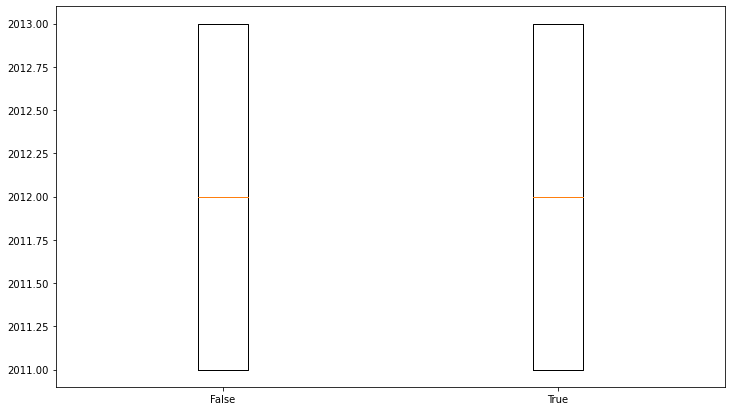

In [15]:
year_1 = train_df[train_df['requester_received_pizza'] == True]['timestamp_converted'].dt.year
year_0 = train_df[train_df['requester_received_pizza'] == False]['timestamp_converted'].dt.year

year_request = [year_1, year_0]

labels = train_df['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(year_request, labels=labels)


In [30]:
# distribution by month
train_df.timestamp_converted.dt.month.value_counts()

7     617
8     528
9     526
6     415
10    301
4     279
5     251
12    247
11    228
1     227
3     213
2     208
Name: timestamp_converted, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9ba91dbdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9ba9222910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9ba91a1430>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9ba8bab760>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9ba92a1f40>,
 'means': []}

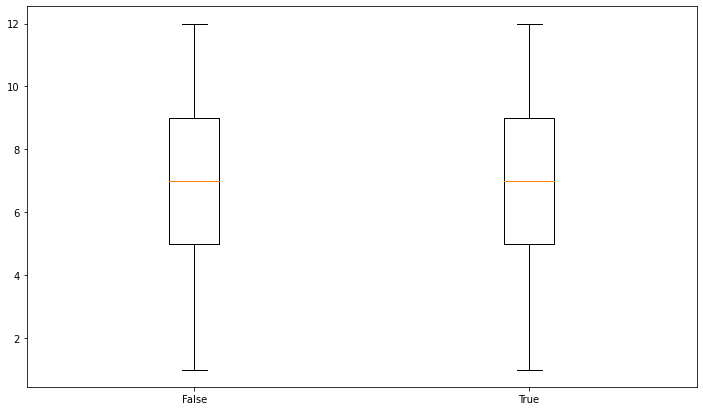

In [31]:
month_1 = train_df[train_df['requester_received_pizza'] == True]['timestamp_converted'].dt.month
month_0 = train_df[train_df['requester_received_pizza'] == False]['timestamp_converted'].dt.month

month_request = [month_1, month_0]

labels = train_df['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(month_request, labels=labels)


In [33]:
np.mean(month_1) - np.mean(month_0)

-0.18813735994430125

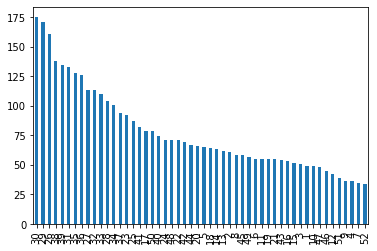

In [85]:
# distribution by week in year
train_df.timestamp_converted.dt.week.astype(int).value_counts().plot(kind='bar')

In [87]:
train_df.timestamp_converted.dt.week.value_counts()

30    175
29    171
26    161
38    138
39    134
31    133
35    128
36    126
27    113
32    113
33    110
28    104
34    101
37     94
23     92
25     87
41     82
17     79
50     79
40     74
24     71
48     71
22     71
42     69
44     67
20     66
5      65
18     64
14     63
13     62
2      61
8      58
45     58
49     57
6      55
11     55
19     55
21     55
43     54
16     53
15     52
3      51
1      49
10     49
47     48
46     45
12     42
51     39
9      36
4      36
7      35
52     34
Name: timestamp_converted, dtype: int64

In [99]:
# relation between week year & outcome 
pd.crosstab(train_df.requester_received_pizza, train_df.timestamp_converted.dt.week)

timestamp_converted,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
requester_received_pizza,,,,,,,,,,,,,,,,,,,,,
False,32,46,40,32,45,33,31,42,34,35,...,42,53,42,36,35,57,43,63,28,19
True,17,15,11,4,20,22,4,16,2,14,...,12,14,16,9,13,14,14,16,11,15


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9baf7656d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9baf765d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9baf765370>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9bafafb490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9bafafb790>,
 'means': []}

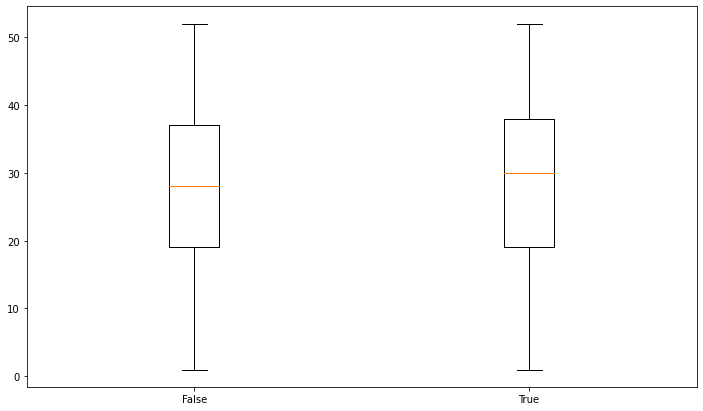

In [16]:
week_1 = train_df[train_df['requester_received_pizza'] == True]['timestamp_converted'].dt.week
week_0 = train_df[train_df['requester_received_pizza'] == False]['timestamp_converted'].dt.week

week_request = [week_1, week_0]

labels = train_df['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(week_request, labels=labels)


In [17]:
np.mean(week_1) - np.mean(week_0)

-0.9441904215840005

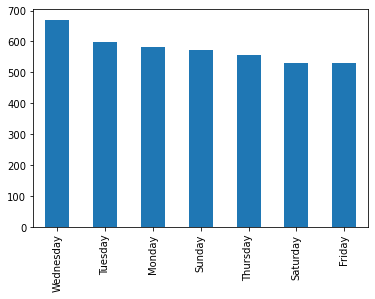

In [74]:
# distribution by weekday
train_df.timestamp_converted.dt.day_name().value_counts().plot(kind='bar')

In [75]:
train_df.timestamp_converted.dt.day_name().value_counts()/len(train_df)

Wednesday    0.165842
Tuesday      0.148267
Monday       0.144059
Sunday       0.141832
Thursday     0.137624
Saturday     0.131436
Friday       0.130941
Name: timestamp_converted, dtype: float64

In [101]:
# relation between week day & outcome 
pd.crosstab(train_df.requester_received_pizza, train_df.timestamp_converted.dt.day_name())

timestamp_converted,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
requester_received_pizza,,,,,,,
False,393,430,414,439,391,461,518
True,136,152,117,134,165,138,152


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9bb2869760>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9bb2869e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9bb2869400>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9bb2872520>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9bb2872820>,
 'means': []}

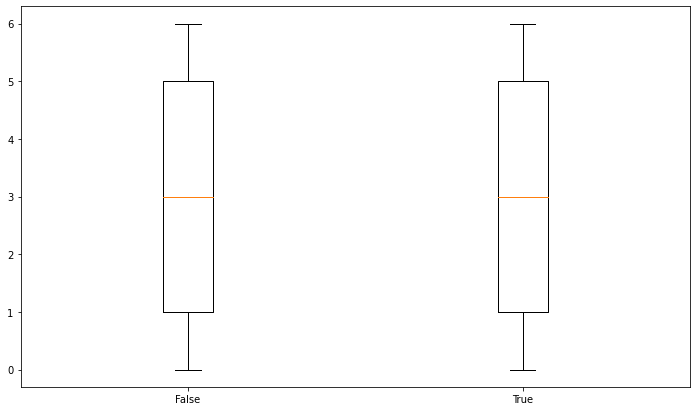

In [24]:
day_1 = train_df[train_df['requester_received_pizza'] == True]['timestamp_converted'].dt.dayofweek
day_0 = train_df[train_df['requester_received_pizza'] == False]['timestamp_converted'].dt.dayofweek

day_request = [day_1, day_0]

labels = train_df['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(day_request, labels=labels)


In [25]:
np.mean(day_1) - np.mean(day_0)

-0.049642569798303615

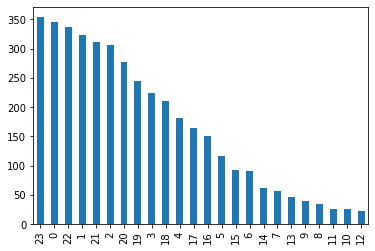

In [80]:
# distribution by hour
train_df.timestamp_converted.dt.hour.value_counts().plot(kind='bar')

In [79]:
train_df.timestamp_converted.dt.hour.value_counts()

23    354
0     346
22    336
1     324
21    312
2     306
20    277
19    244
3     224
18    210
4     181
17    164
16    150
5     117
15     93
6      91
14     62
7      56
13     47
9      39
8      35
11     25
10     25
12     22
Name: timestamp_converted, dtype: int64

In [102]:
# relation between hour & outcome 
pd.crosstab(train_df.requester_received_pizza, train_df.timestamp_converted.dt.hour)

timestamp_converted,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
requester_received_pizza,,,,,,,,,,,,,,,,,,,,,
False,262,224,239,177,139,101,71,46,30,31,...,45,62,105,116,152,176,212,236,268,262
True,84,100,67,47,42,16,20,10,5,8,...,17,31,45,48,58,68,65,76,68,92


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9baed0f430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9baed1b160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9baf649910>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9baed1bc10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9baed1b070>,
 'means': []}

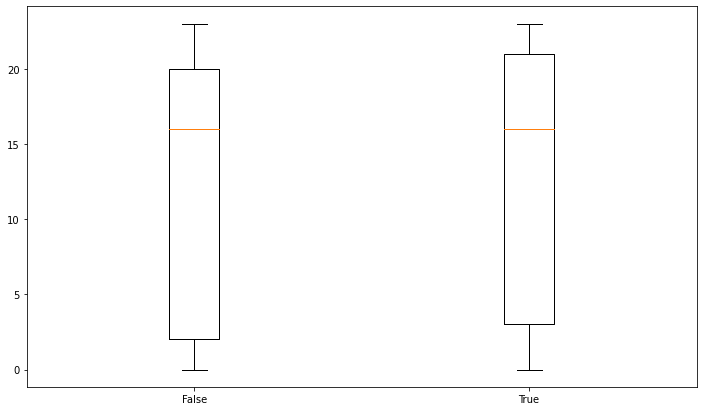

In [26]:
hour_1 = train_df[train_df['requester_received_pizza'] == True]['timestamp_converted'].dt.hour
hour_0 = train_df[train_df['requester_received_pizza'] == False]['timestamp_converted'].dt.hour

hour_request = [hour_1, hour_0]

labels = train_df['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(hour_request, labels=labels)

In [29]:
np.mean(hour_1) - np.mean(hour_0)

0.25327077369007256

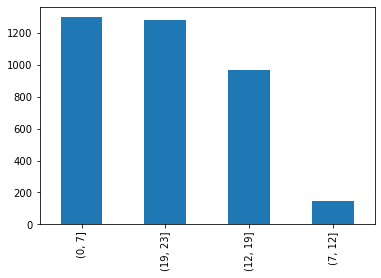

In [46]:
# bin hours into three groups: 
train_df['hour_bins'] = pd.cut(train_df['timestamp_converted'].dt.hour, [0, 7, 12, 19, 23])
train_df['hour_bins'].value_counts().plot(kind='bar')


In [47]:
# relation between hour bins& outcome 
pd.crosstab(train_df.requester_received_pizza, train_df.hour_bins)

hour_bins,"(0, 7]","(7, 12]","(12, 19]","(19, 23]"
requester_received_pizza,,,,
False,997,122,687,978
True,302,24,283,301


Summary
- Majority posts seem to be on Wednesdays
- Hour of the day seems to have an effect, most requests after 6pm 
- Weeks 26 to 39 make up majority of the data

# colname: requester_received_pizza (dependent)

In [28]:
# outcome variable
train_df.requester_received_pizza.value_counts()

False    3046
True      994
Name: requester_received_pizza, dtype: int64

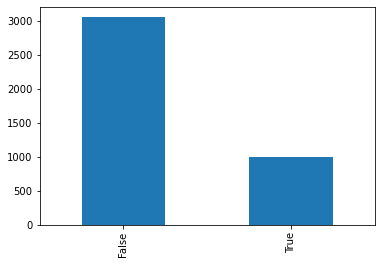

In [30]:
train_df.requester_received_pizza.value_counts().plot(kind='bar')

## Text field

In [49]:
# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

In [48]:
train_df.request_text_edit_aware.value_counts()

In [52]:
for example in range(10):
    print("Example: ", example+1)       
    print("Label: ", train_df['requester_received_pizza'][example])
    print("Message: \n", train_df['request_text_edit_aware'][example])
    print("--- \n")
    ### STUDENT END ###

Example:  1
Label:  False
Message: 
 Hi I am in need of food for my 4 children we are a military family that has really hit hard times and we have exahusted all means of help just to be able to feed my family and make it through another night is all i ask i know our blessing is coming so whatever u can find in your heart to give is greatly appreciated
--- 

Example:  2
Label:  False
Message: 
 I spent the last money I had on gas today. Im broke until next Thursday :(
--- 

Example:  3
Label:  False
Message: 
 My girlfriend decided it would be a good idea to get off at Perth bus station when she was coming to visit me and has since had to spend all her money on a taxi to get to me here in Dundee. Any chance some kind soul would get us some pizza since we don't have any cash anymore?
--- 

Example:  4
Label:  False
Message: 
 It's cold, I'n hungry, and to be completely honest I'm broke. My mum said we're having leftovers for dinner. A random pizza arriving would be nice.

Edit: We had le

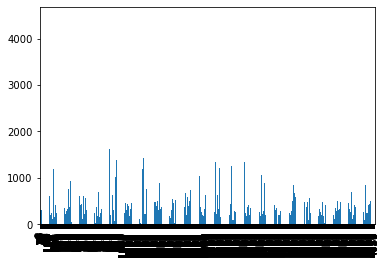

In [63]:
train_df['request_text_edit_aware'].str.len().plot(kind='bar')

In [54]:
# unigram vectorizer
vectorizer_1 = CountVectorizer()
mat_1 = vectorizer_1.fit_transform(train_df['request_text_edit_aware'])
print("Size of Vocabulary:", mat_1.shape[1])
print('Average Number of Non-Zero Features Per Example: ', round(mat_1.nnz / mat_1.shape[0], 2))
print("Fraction of Non-Zero entries in matrix:", 
          round(100 * mat_1.nnz/(mat_1.shape[0] * mat_1.shape[1]), 2), "%")
print("With alphabetical order, the 0th feature string is:", vectorizer_1.get_feature_names()[0], 
         "\n the last feature string is:", vectorizer_1.get_feature_names()[-1])

Size of Vocabulary: 12317
Average Number of Non-Zero Features Per Example:  53.56
Fraction of Non-Zero entries in matrix: 0.43 %
With alphabetical order, the 0th feature string is: 00 
 the last feature string is: zza


pizza 3623
just 1804
help 1445
really 1269
food 1192
money 1111
ve 1058
don 956
pay 916
like 887
thanks 887
week 836
work 824
job 794
time 784
love 715
day 666
got 654
know 597
make 590


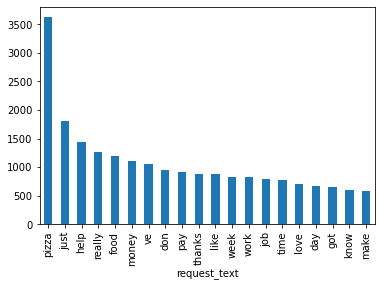

In [68]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(train_df['request_text_edit_aware'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['request_text' , 'count'])
df2.groupby('request_text').sum()['count'].sort_values(ascending=False).plot(kind='bar')

In [57]:
# bigram vectorizer
vectorizer_2 = CountVectorizer(analyzer='char', ngram_range=(2,2))
mat_2 = vectorizer_2.fit_transform(train_df['request_text_edit_aware'])
print("Size of Vocabulary:", mat_2.shape[1])
print('Average Number of Non-Zero Features Per Example: ', round(mat_2.nnz / mat_2.shape[0], 2))
print("Fraction of Non-Zero entries in matrix:", 
          round(100 * mat_2.nnz/(mat_2.shape[0] * mat_2.shape[1]), 2), "%")

Size of Vocabulary: 2601
Average Number of Non-Zero Features Per Example:  152.4
Fraction of Non-Zero entries in matrix: 5.86 %


pay forward 433
love pizza 210
imgur com 208
http imgur 203
bank account 135
really appreciate 132
pizza hut 124
college student 124
return favor 120
thanks reading 119
just got 115
don know 114
lost job 111
year old 111
sob story 110
new job 107
pizza tonight 104
thanks advance 104
ve got 95
http www 94


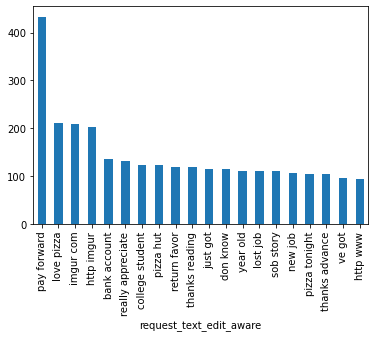

In [70]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(train_df['request_text_edit_aware'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['request_text_edit_aware' , 'count'])
df3.groupby('request_text_edit_aware').sum()['count'].sort_values(ascending=False).plot(kind='bar')

In [71]:
# bigram, trigram vectorizer
vectorizer_3 = CountVectorizer(analyzer='char', ngram_range=(3,3))
mat_3 = vectorizer_3.fit_transform(train_df['request_text_edit_aware'])
print("Size of Vocabulary:", mat_3.shape[1])
print('Average Number of Non-Zero Features Per Example: ', round(mat_3.nnz / mat_3.shape[0], 2))
print("Fraction of Non-Zero entries in matrix:", 
          round(100 * mat_3.nnz/(mat_2.shape[0] * mat_3.shape[1]), 2), "%")

Size of Vocabulary: 17622
Average Number of Non-Zero Features Per Example:  274.39
Fraction of Non-Zero entries in matrix: 1.56 %


http imgur com 203
promise pay forward 48
pay forward soon 47
long story short 45
www reddit com 44
http www reddit 42
ll pay forward 41
really appreciate pizza 38
really use pizza 36
random act pizza 36
random acts pizza 32
sob story just 29
help greatly appreciated 29
broke college student 29
taking time read 24
started new job 24
really love pizza 23
pay forward paid 23
definitely pay forward 23
long time lurker 18


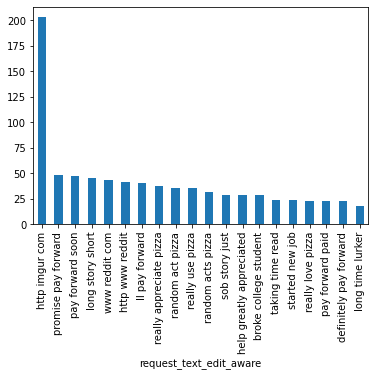

In [73]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(train_df['request_text_edit_aware'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['request_text_edit_aware' , 'count'])
df6.groupby('request_text_edit_aware').sum()['count'].sort_values(ascending=False).plot(kind='bar')

In [61]:
from sklearn.feature_extraction.text import TfidfTransformer
# create tf-idf object
vectorizer_4 = TfidfVectorizer()

# learn the vocabulary and store tf-idf sparse matrix in tfidf
tfidf = vectorizer_4.fit_transform(train_df['request_text_edit_aware'])

print("Size of Vocabulary:", tfidf.shape[1])
print('Average Number of Non-Zero Features Per Example: ', round(tfidf.nnz / tfidf.shape[0], 2))
print("Fraction of Non-Zero entries in matrix:", 
          round(100 * tfidf.nnz/(tfidf.shape[0] * tfidf.shape[1]), 2), "%")                      

Size of Vocabulary: 12317
Average Number of Non-Zero Features Per Example:  53.56
Fraction of Non-Zero entries in matrix: 0.43 %


pizza 198.1470690131613
just 123.63086874953979
help 114.33175540881969
really 104.61025810241856
food 96.38348284456708
money 93.60305201365308
thanks 86.31424441749401
love 81.94120450077126
don 81.87802060275997
pay 81.76533110543858
ve 79.05956839898924
week 77.31178481280318
like 75.20066893304423
job 70.12254866027159
work 69.29517898417505
time 66.02690941076247
broke 65.2812616081544
paid 64.40005242818346
day 63.7931383087479
forward 62.98888776728672


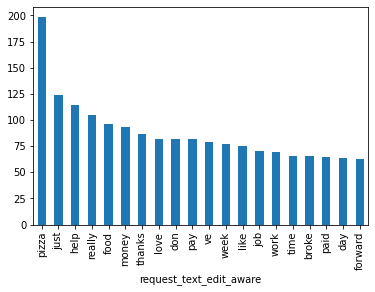

In [74]:
def get_top_n_trigram(corpus, n=None):
    vec = TfidfVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(train_df['request_text_edit_aware'], 20)
for word, freq in common_words:
    print(word, freq)
df7 = pd.DataFrame(common_words, columns = ['request_text_edit_aware' , 'count'])
df7.groupby('request_text_edit_aware').sum()['count'].sort_values(ascending=False).plot(kind='bar')